In [1]:
from typing import List
import matplotlib.pyplot as plt
import numpy as np


from scipy.integrate import odeint

In [2]:
from molNet.rxn.general import Reaction, Substance, ReactionSet
ZA=Substance(name="A")
ZB=Substance(name="B")
ZC=Substance(name="C")
ZD=Substance(name="D")

zalinskya=Reaction(k=0.01)
zalinskya.add_reactant(ZA,1)
zalinskya.add_reactant(ZB,1)
zalinskya.add_product(ZA,1)
zalinskya.add_product(ZA,1)

zalinskyb=Reaction(k=0.02)
zalinskyb.add_reactant(ZB,1)
zalinskyb.add_reactant(ZC,1)
zalinskyb.add_product(ZB,2)

zalinskyc=Reaction(k=0.03)
zalinskyc.add_reactant(ZC,1)
zalinskyc.add_reactant(ZA,1)
zalinskyc.add_product(ZC,2)

zalinskyd=Reaction(k=0.001)
zalinskyd.add_reactant(ZA,1)
zalinskyd.add_product(ZD,0.7)
zalinskyd

In [3]:
rs = ReactionSet()
rs.add_reaction(zalinskya)
rs.add_reaction(zalinskyb)
rs.add_reaction(zalinskyc)
rs.add_reaction(zalinskyd)
rs

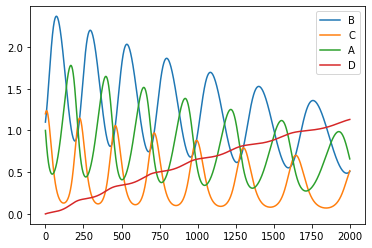

In [10]:
T=2000
dT=0.1
ts=np.arange(0,T,dT)
diff_eq,data = rs.get_differential_function()

conc_map={ZA:1,ZB:1.1,ZC:1.2,ZD:0}
conc=[conc_map[r] for r in data['substances']]

ys = odeint(diff_eq,conc,ts,hmax=dT)

for i in range(ys.shape[1]):
    plt.plot(ts[:ys.shape[0]],ys[:,i],
                 label=data['substances'][i]
                 )
plt.legend()


In [5]:
#data['_step_diff'].inspect_types()

In [6]:
T=1000
dT=0.01
ts=np.arange(0,T,dT)
%timeit odeint(diff_eq,conc,ts,hmax=dT)


200 ms ± 2.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
